# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print( df.duplicated().sum())
df.duplicated()


720


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print( df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()


Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [7]:
# * Print how long our dataframe is.
df.shape[0]

11194

In [8]:
# * Remove any row that has a null value in it. 
df = df.dropna()


In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.shape[0]


11092

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<Axes: ylabel='Make'>

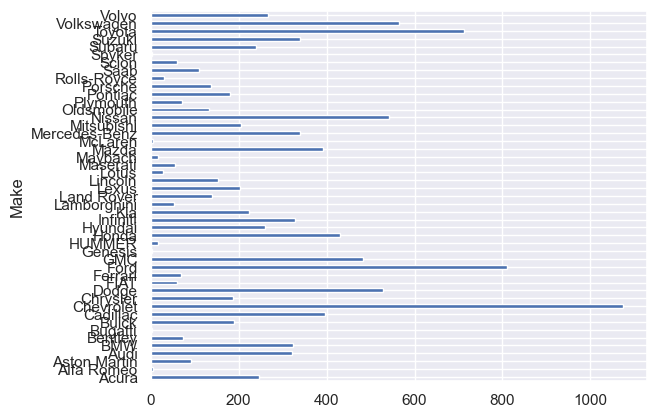

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
gb = df.groupby('Make')['Make'].count()

gb.plot(kind = 'barh')


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<Axes: ylabel='Make'>

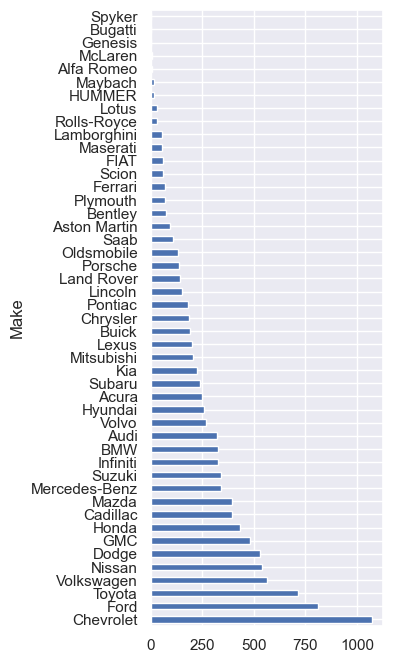

In [11]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
make_count = df.groupby('Make')['Make'].count() 

make_count.sort_values(ascending=False).plot(kind='barh',
                                            figsize = (3,8))
#it seems that it automaticlaly makes it horizontal

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


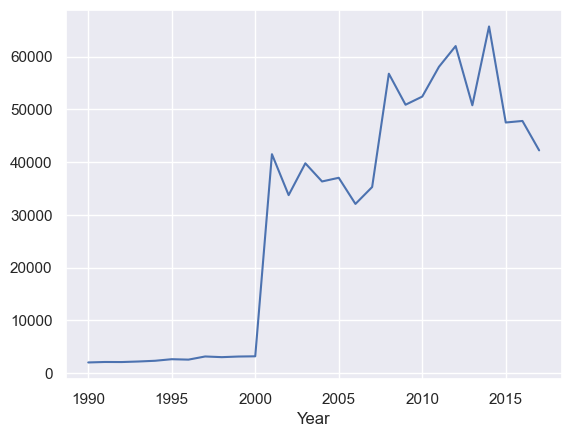

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
bug = df.groupby('Year')

avg_msrp = bug['MSRP'].mean()


avg_MSRP_per_year = avg_msrp.plot.line(x='Year', y='Avg Msrp', legend=False)

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [13]:
# Make a column where MSRP is 10 when year is less than 2000, else 1.

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = np.where(df['Year'] <= 2000, 
                                df['MSRP'] * 10,
                                df['MSRP'])

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

(0.0, 100000.0)

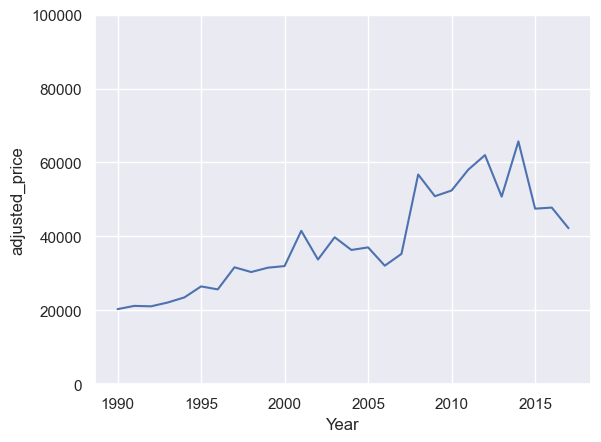

In [14]:
# Plot new prices
bug = df.groupby('Year')['adjusted_price'].mean() 

avg_MSRP_per_year = sns.lineplot(data = bug)

avg_MSRP_per_year.set_ylim(0, 100000)

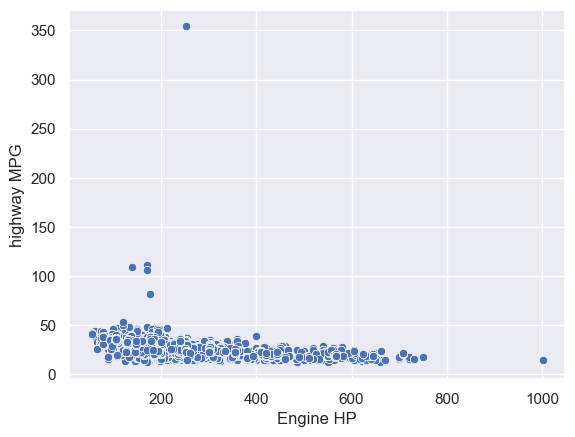

In [15]:
# Plot the relationship between Engine HP and highway MPG
ax = sns.scatterplot(data = df,
                    x = 'Engine HP',
                    y = 'highway MPG')


In [16]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
con1 = df['highway MPG'] < 150
con2 = df['Engine HP'] < 800

df_filtered = df[con1 & con2]

# Replot the relationship between Engine HP and highway MPG


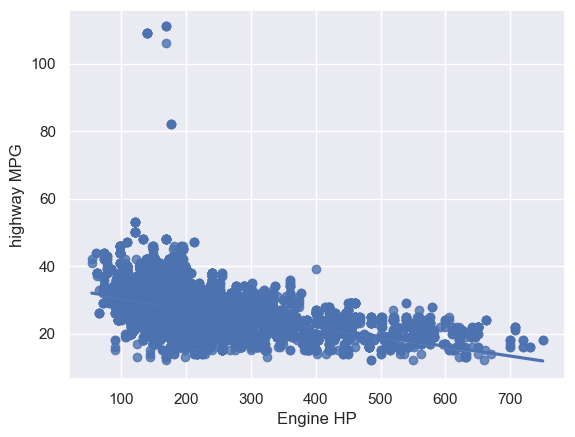

In [17]:
# Re-Plot the relationship between Engine HP and highway MPG
ax = sns.regplot(data = df_filtered,
                    x = 'Engine HP',
                    y = 'highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

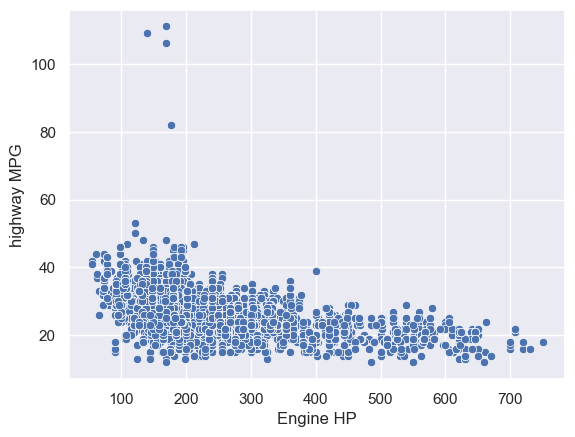

In [18]:
# Make a scatter plot of Engine HP vs highway MPG
ax = sns.scatterplot(data = df_filtered,
                    x = 'Engine HP',
                    y = 'highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [19]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('As your engine HP increases your highway MPG will decrease')

As your engine HP increases your highway MPG will decrease


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

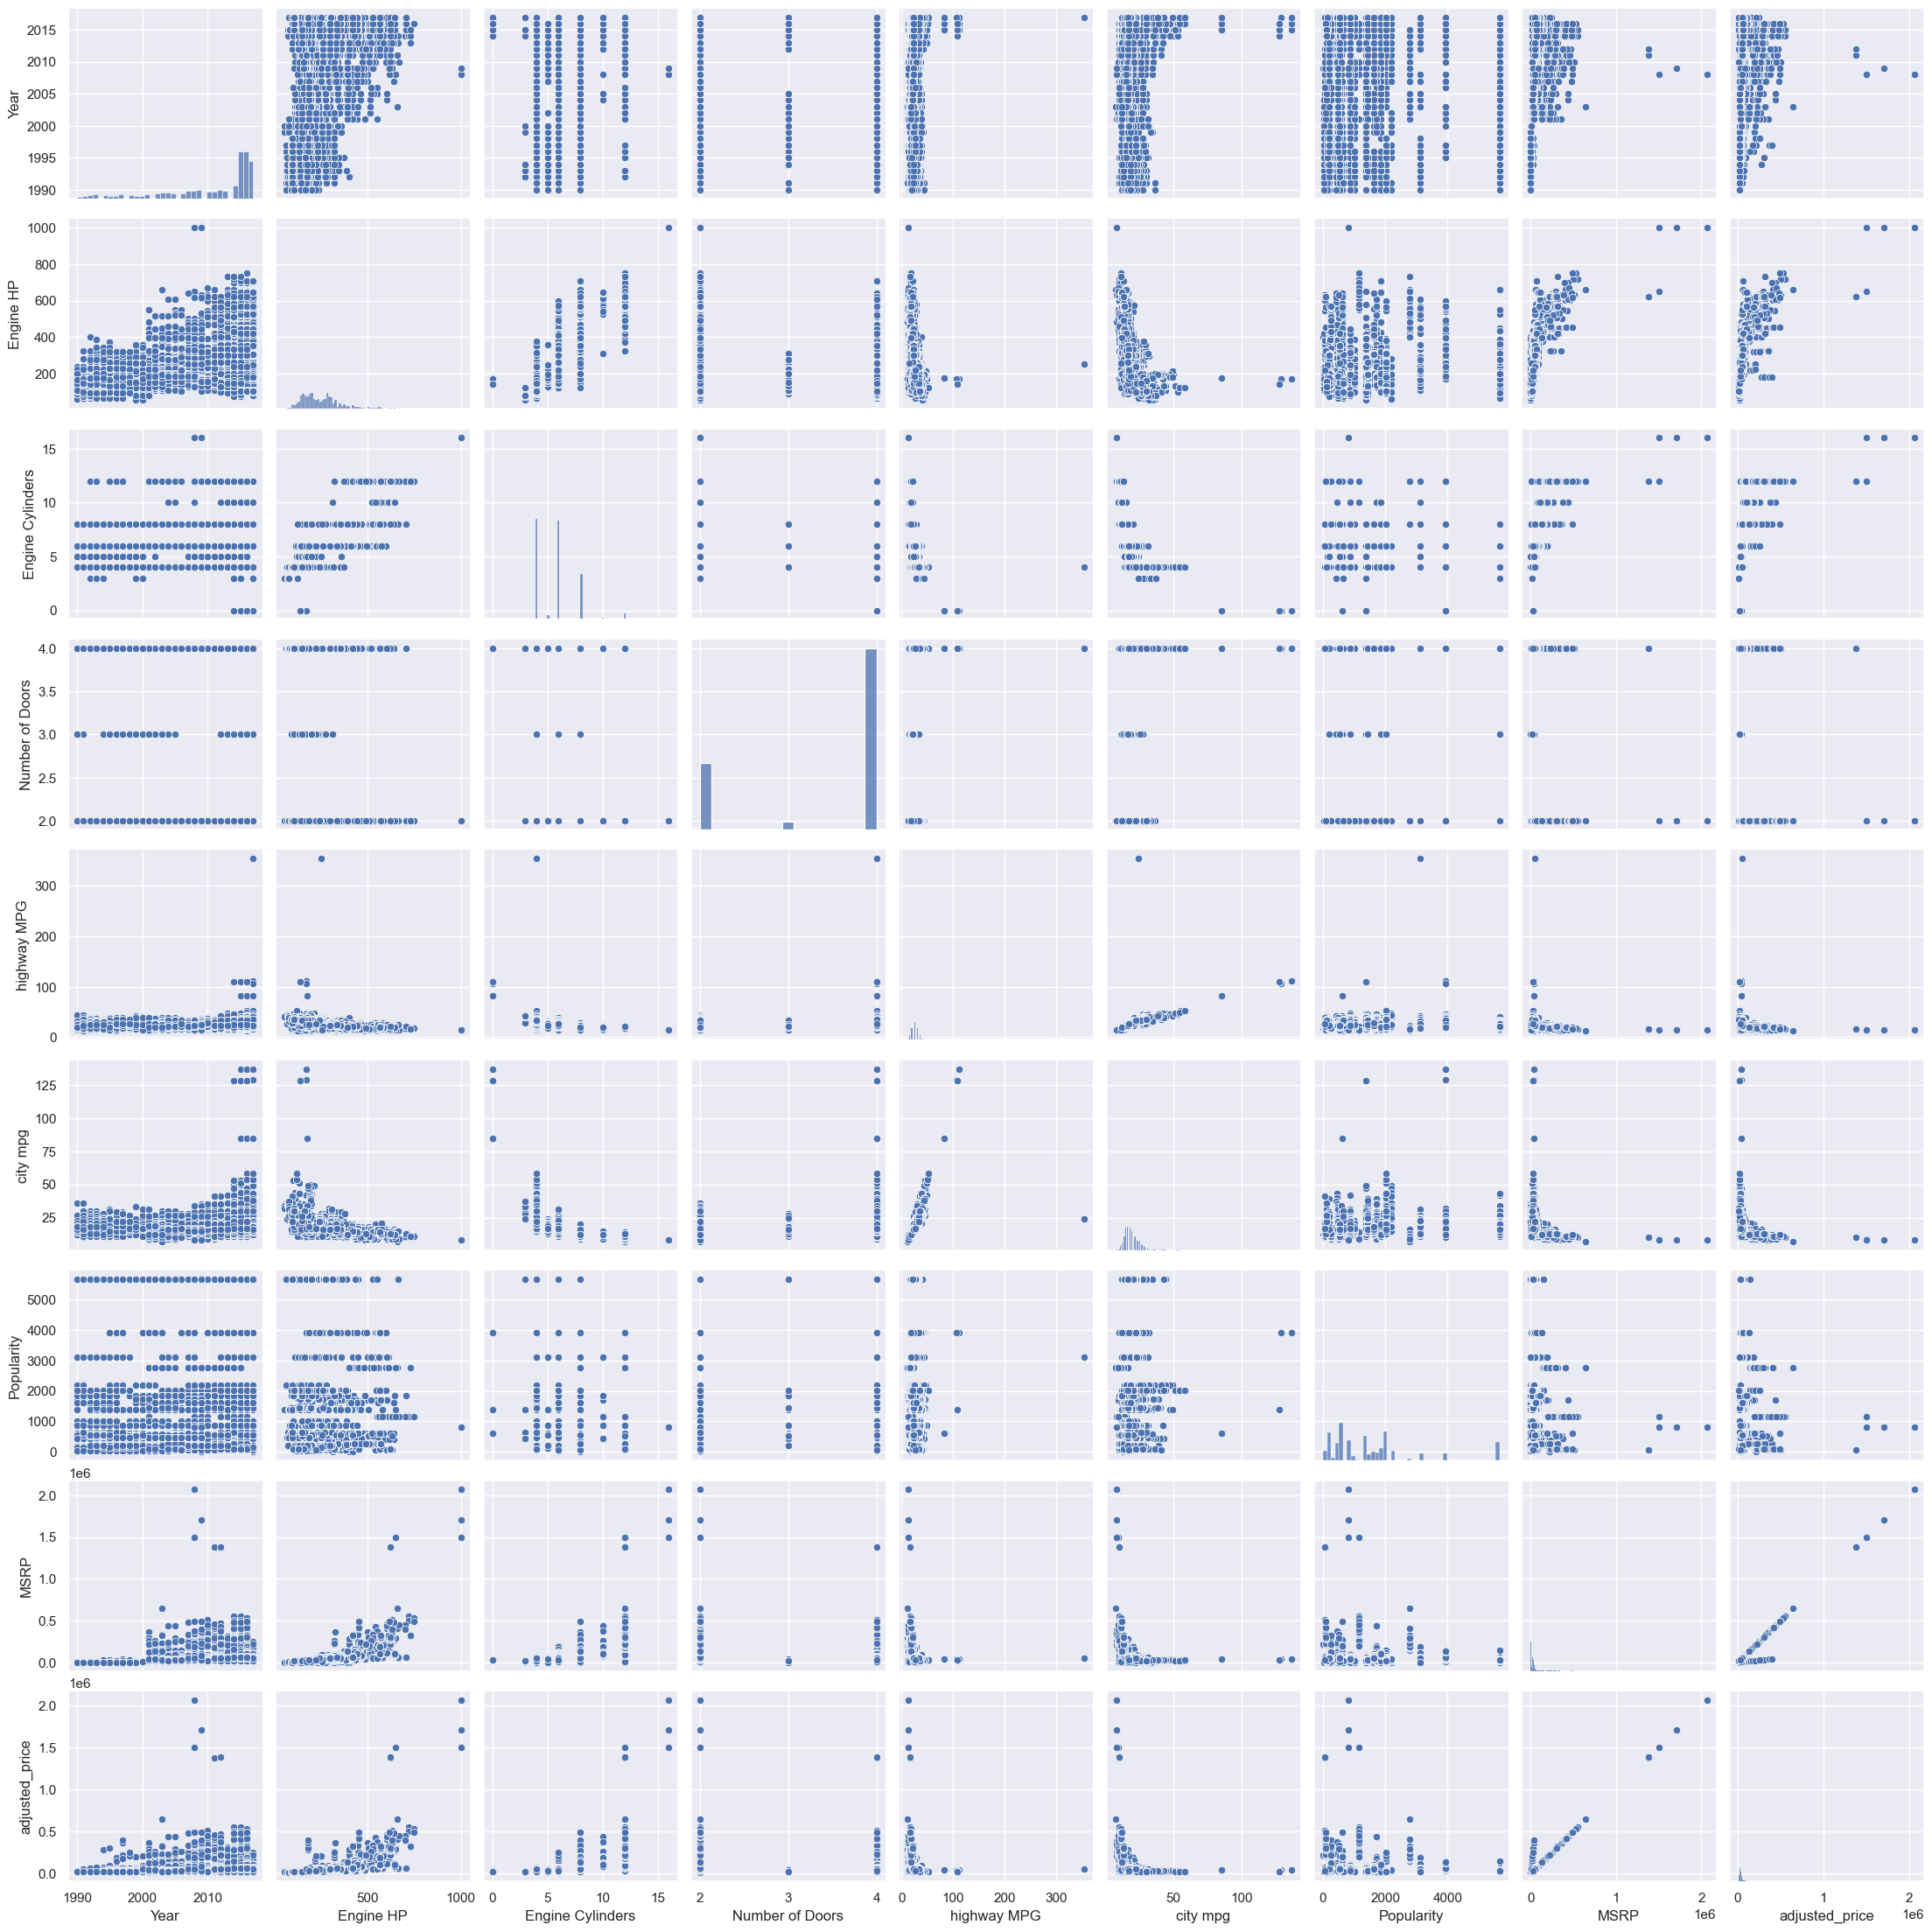

In [20]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)


In [21]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('Highway MPG and City MPG seem to have a positive linear realtion ship')


Highway MPG and City MPG seem to have a positive linear realtion ship


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

<Axes: >

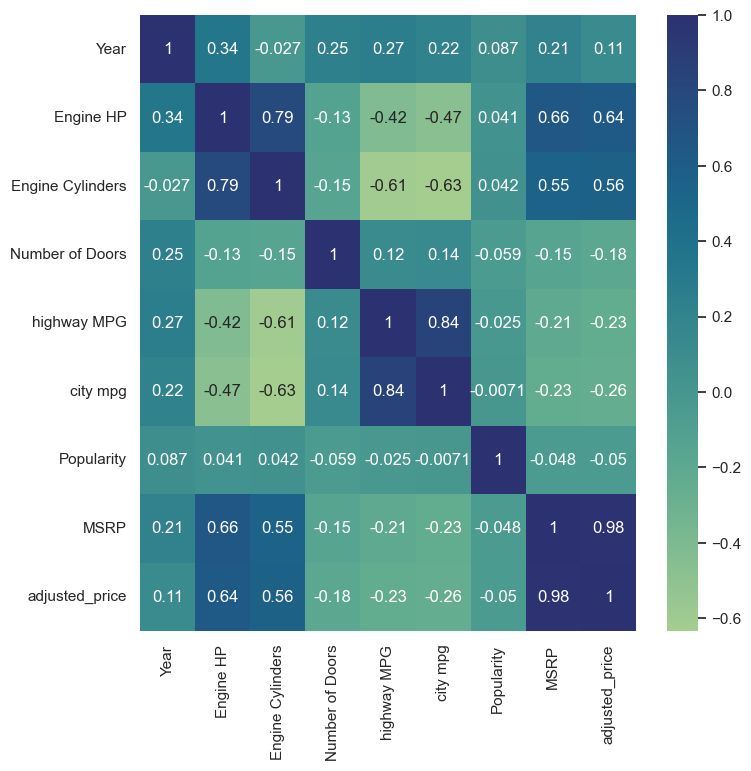

In [22]:
df_corr = df.corr(method = 'pearson', numeric_only = True) 
#pearson or kendall as options for stat nerds numeric = true to get rid of other non numeric catogories

fig, ax = plt.subplots(figsize=(8,8)) #figure size 8*8

sns.heatmap(df_corr,cmap="crest", annot=True, ax=ax) #data, color, decimal correlation, axis control

In [23]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the strongest relationship with Engine Cylinders. \nThis probably has something to do with power and the more cylinders a vehicle has the more Horse power it would have.')

Engine HP has the strongest relationship with Engine Cylinders. 
This probably has something to do with power and the more cylinders a vehicle has the more Horse power it would have.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




In [24]:
# https://gist.github.com/georgerichardson/db66b686b4369de9e7196a65df45fc37 
# This code does it for you I don't know how to read it that well

import string
import re

def standardise_column_names(df, remove_punct=True):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

    for c in df.columns:
        c_mod = c.lower()
        if remove_punct:            
            c_mod = c_mod.translate(translator)
        c_mod = '_'.join(c_mod.split(' '))
        if c_mod[-1] == '_':
            c_mod = c_mod[:-1]
        c_mod = re.sub(r'\_+', '_', c_mod)
        df.rename({c: c_mod}, inplace=True, axis=1)
    return df
df = standardise_column_names(df)
df

df.coulmns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,50920


In [25]:
sq = pd.read_csv('data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

def standardise_column_names(sq, remove_punct=True):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

    for c in sq.columns:
        c_mod = c.lower()
        if remove_punct:            
            c_mod = c_mod.translate(translator)
        c_mod = '_'.join(c_mod.split(' '))
        if c_mod[-1] == '_':
            c_mod = c_mod[:-1]
        c_mod = re.sub(r'\_+', '_', c_mod)
        sq.rename({c: c_mod}, inplace=True, axis=1)
    return sq
sq = standardise_column_names(sq)
sq

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444),NaN,19,4,19,13
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083),NaN,19,4,19,13
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029),NaN,19,4,19,13
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894),NaN,19,4,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466),NaN,19,4,19,13
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973),NaN,19,4,19,13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883),NaN,19,4,19,13
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912),NaN,19,4,19,13


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [27]:
sq['primary_fur_color'].value_counts()

Gray        2473
Cinnamon     392
Black        103
Name: primary_fur_color, dtype: int64

In [28]:
sq['highlight_fur_color'].value_counts()

Cinnamon                  767
White                     585
Cinnamon, White           268
Gray                      170
Gray, White                59
Black                      34
Black, Cinnamon, White     32
Black, White               10
Black, Cinnamon             9
Gray, Black                 3
Name: highlight_fur_color, dtype: int64

In [29]:
street_map = gpd.read_file('data/CentralPark.shp')
#where do the different colored squirrels hang out in central park?
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

<Axes: >

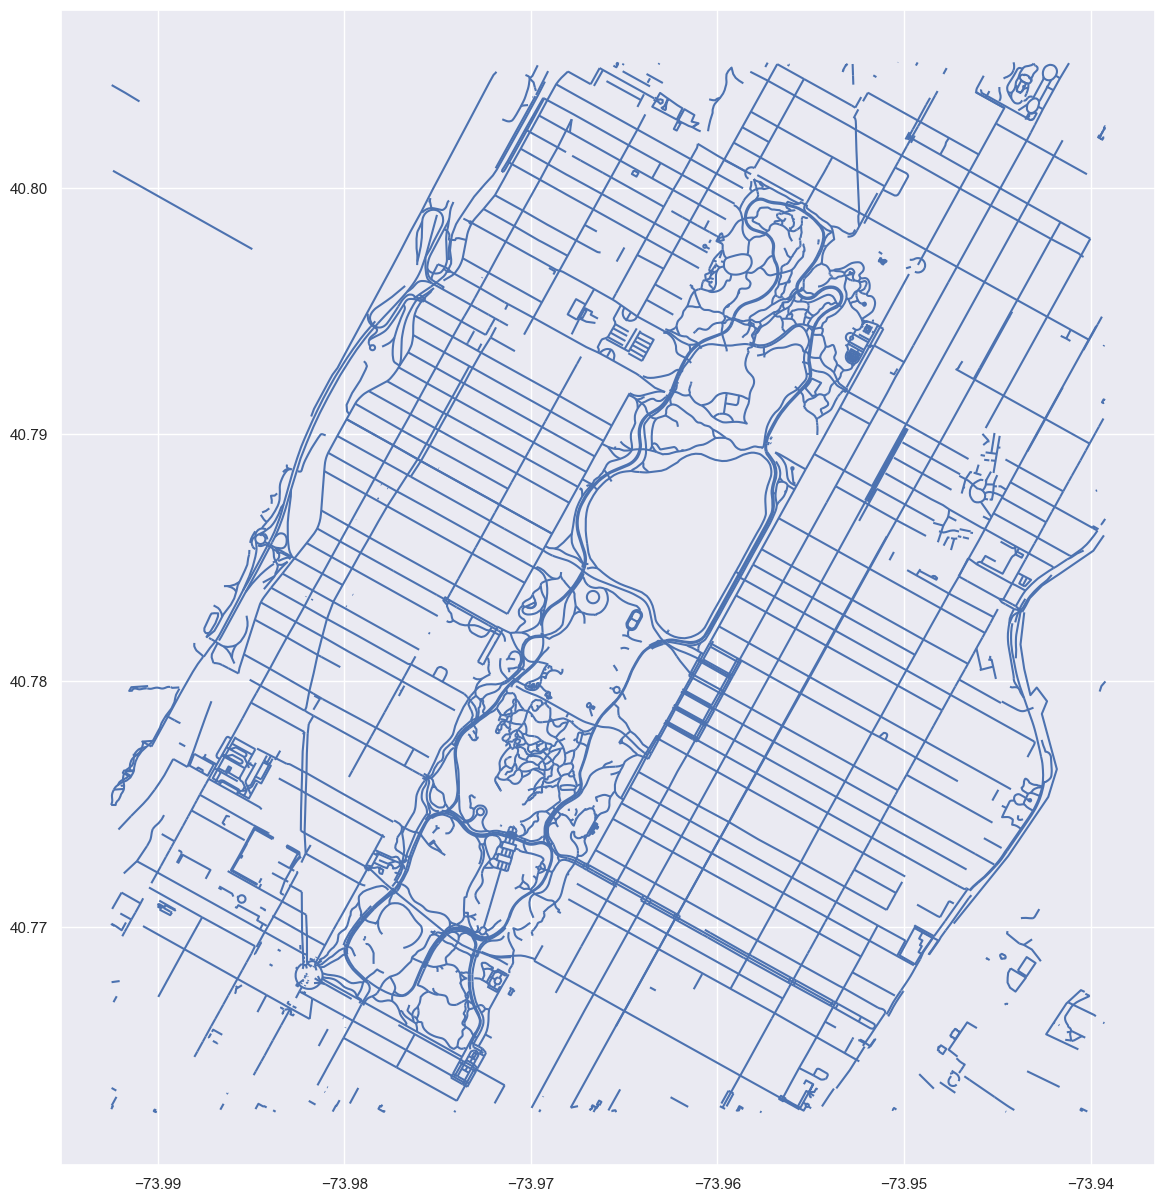

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)
#map of central park 

In [31]:
sq.head()

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444),NaN,19,4,19,13
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083),NaN,19,4,19,13
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029),NaN,19,4,19,13
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894),NaN,19,4,19,13


In [32]:

crs = {'init':'epsg:4326'}

geometry = [Point(xy) for xy in zip(sq['x'], sq['y'])]
geometry[:3]
#the file already came with a points/ geometry column but it stated it wasn't in the right format

[<POINT (-73.956 40.794)>, <POINT (-73.969 40.784)>, <POINT (-73.974 40.776)>]

In [33]:
geo_sq = gpd.GeoDataFrame(sq, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_sq.head()

C:\Users\henry\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts,geometry
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13,POINT (-73.95613 40.79408)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,NaN,POINT (-73.9688574691102 40.7837825208444),NaN,19,4,19,13,POINT (-73.96886 40.78378)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,NaN,POINT (-73.97428114848522 40.775533619083),NaN,19,4,19,13,POINT (-73.97428 40.77553)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,True,NaN,POINT (-73.9596413903948 40.7903128889029),NaN,19,4,19,13,POINT (-73.95964 40.79031)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,NaN,POINT (-73.9702676472613 40.7762126854894),NaN,19,4,19,13,POINT (-73.97027 40.77621)


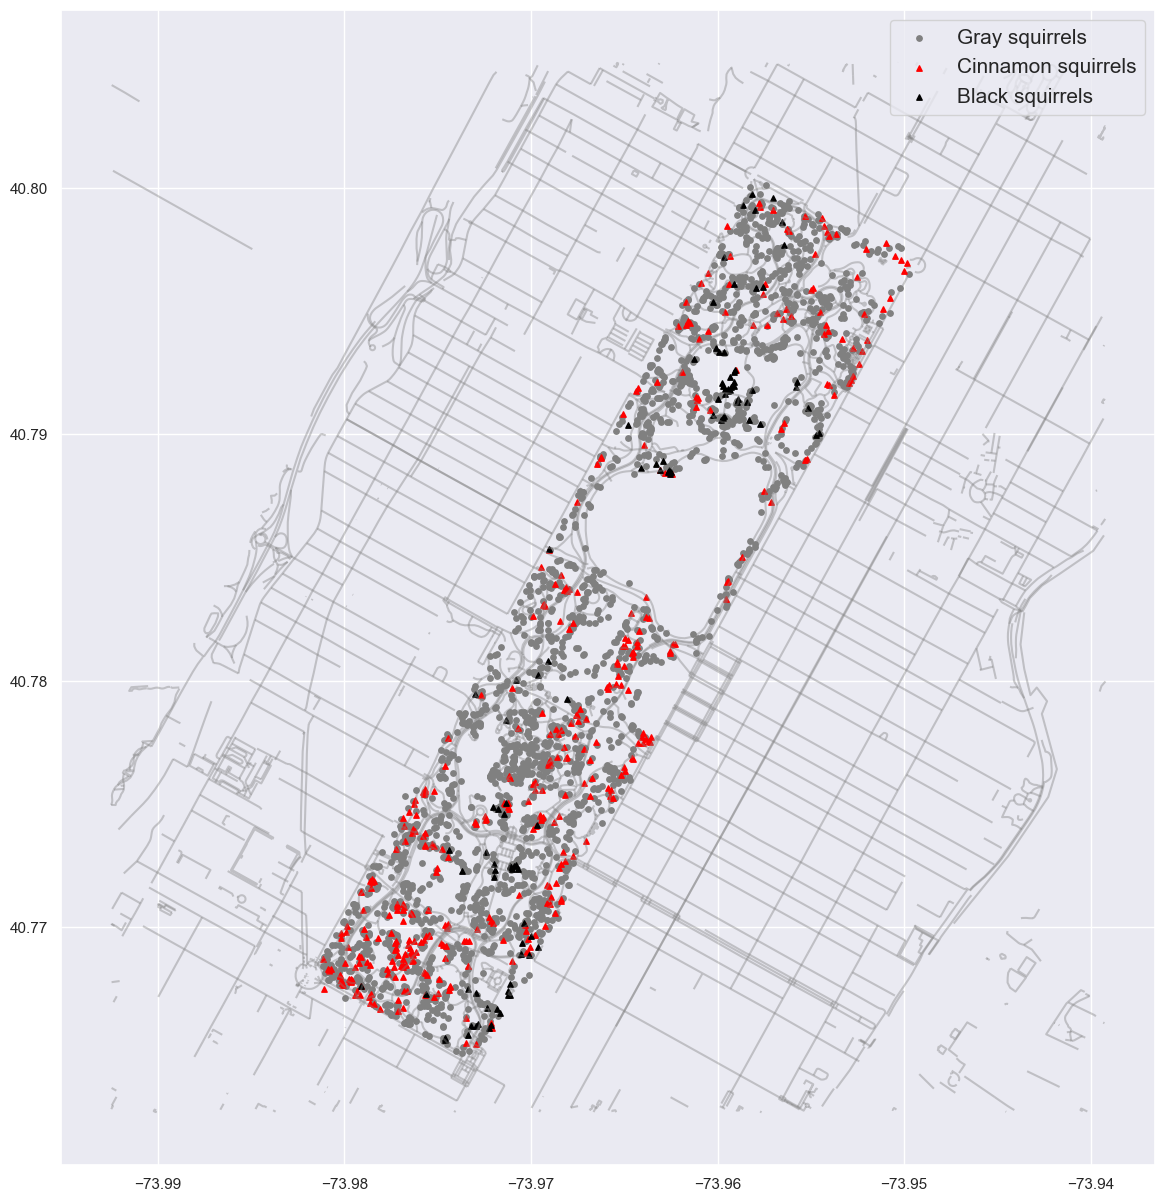

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_sq[geo_sq['primary_fur_color'] == 'Gray'].plot(ax=ax, 
                                       markersize=15, 
                                       color='Gray', 
                                       marker='o', 
                                       label='Gray squirrels')
geo_sq[geo_sq['primary_fur_color'] == 'Cinnamon'].plot(ax=ax, 
                                       markersize=15, 
                                       color='red', 
                                       marker='^', 
                                       label='Cinnamon squirrels')
geo_sq[geo_sq['primary_fur_color'] == 'Black'].plot(ax=ax, 
                                       markersize=15, 
                                       color='Black', 
                                       marker='^', 
                                       label='Black squirrels')
plt.legend(prop={'size':15})

#red squirels are spread out evenly; There is not secret society of red squirrels that has avoided me I'm just unlucky

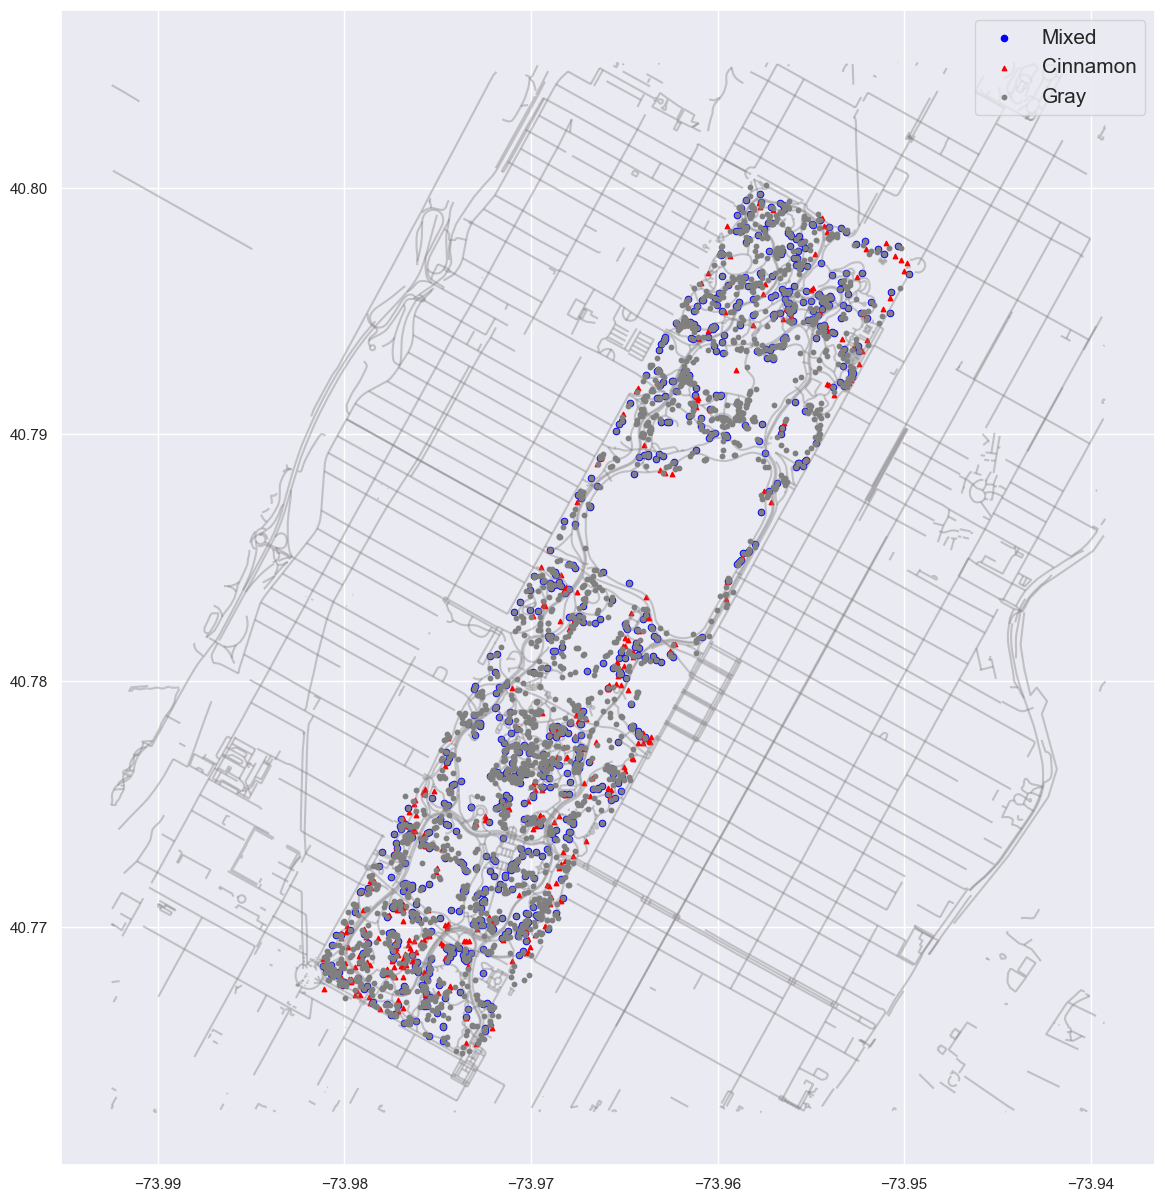

In [35]:
'''
This way of orgnizing things feels a lot easier to work with
our catagories are clearly orginized from initialization to plotting 
'''

# Create figure and axes
fig, ax = plt.subplots(figsize=(15,15))

# Plot street map
street_map.plot(ax=ax, alpha=0.4, color='grey') 

# Filter data
mixed = geo_sq[(geo_sq['primary_fur_color']=='Gray') & 
               (geo_sq['highlight_fur_color']=='Cinnamon')]

cinnamon = geo_sq[geo_sq['primary_fur_color']=='Cinnamon']

gray = geo_sq[geo_sq['primary_fur_color']=='Gray']

# Plot each subset of data
mixed.plot(ax=ax, markersize=20, color='Blue', marker='o', label='Mixed')
cinnamon.plot(ax=ax, markersize=10, color='Red', marker='^', label='Cinnamon')  
gray.plot(ax=ax, markersize=10, color='Gray', marker='o', label='Gray')

# Legend
plt.legend(prop={'size': 15})